In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os

In [2]:
# CSV: Comma Separated Value, 콤마로 구분된 값이라는 뜻
# Pandas에 csv를 읽어드리는 함수가 있음, sep: 구분자
abalone_data = pd.read_csv(os.path.join('data','abalone.csv'), 
                 sep=',', 
                 names=['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
                 header=None
)

# 잘 생성되었는지 확인(전체 행과 열을 확인)
print(abalone_data.shape)

(4177, 9)


In [3]:
# 상위 5개 데이터 확인
abalone_data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
label = abalone_data['Sex'] # labeling
del abalone_data['Sex'] # "Sex" column 삭제

print(abalone_data.shape)

(4177, 8)


In [5]:
abalone_data.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
# 변수 정규화
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() # MinMaxScaler: 모든 feature 값이 0~1사이에 있도록 scaling
scaler.fit(abalone_data)
norm_data = scaler.fit_transform(abalone_data) # 위에서 만들어진 scaler를 이용하여 주어진 데이터 scaling
print(norm_data)
print('최대: ',np.max(norm_data),', 최소: ',np.min(norm_data)) # 잘 생성되었는지 확인

[[0.51351351 0.5210084  0.0840708  ... 0.1323239  0.14798206 0.5       ]
 [0.37162162 0.35294118 0.07964602 ... 0.06319947 0.06826109 0.21428571]
 [0.61486486 0.61344538 0.11946903 ... 0.18564845 0.2077728  0.28571429]
 ...
 [0.70945946 0.70588235 0.18141593 ... 0.37788018 0.30543099 0.28571429]
 [0.74324324 0.72268908 0.13274336 ... 0.34298881 0.29347285 0.32142857]
 [0.85810811 0.84033613 0.17256637 ... 0.49506254 0.49177877 0.39285714]]
최대:  1.0 , 최소:  0.0


In [7]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer() # LabelBinarizer: change 'text->number & number->one hot vector'
transformed_label = encoder.fit_transform(label)

print(encoder.classes_) # 잘 생성되었는지 확인
print(transformed_label)

['F' 'I' 'M']
[[0 0 1]
 [0 0 1]
 [1 0 0]
 ...
 [0 0 1]
 [1 0 0]
 [0 0 1]]


In [8]:
# Sklearn의 train_test_split 함수를 써서 train/test data 분할
from sklearn.model_selection import train_test_split

# arrays에 데이터와 레이블을 둘 다 넣었기 때문에 train,test 데이터셋이 분할되어 반환됨.(7:3)
# random_state: 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값(int나 RandomState로 입력)
trnx, tstx, trny, tsty = train_test_split(norm_data, transformed_label, test_size=0.3, random_state=111) 

In [9]:
# Sklearn을 이용해서 Classifier A를 만든다(예제와 다른 옵션 사용)
from sklearn.neural_network import MLPClassifier
clf_A = MLPClassifier(hidden_layer_sizes=(100,400,800,400,100,))
clf_A.fit(trnx, trny) # 학습 데이터 fit -> tuning
tsty_hat = clf_A.predict(tstx) # predict 진행

In [10]:
# Classifier A의 정보 확인
print(clf_A)
print("\n",clf_A.loss_curve_)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 400, 800, 400, 100),
              learning_rate='constant', learning_rate_init=0.001, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

 [1.8305154416981675, 1.6437736328541757, 1.6090201831681386, 1.5898905852660066, 1.5782145981413163, 1.5779243305244097, 1.5637844045697502, 1.5607525397741944, 1.5548003278206195, 1.5457332052042057, 1.5585223295321924, 1.5535470490475607, 1.5623218138364605, 1.538320298557367, 1.5371389915097349, 1.534160507068478, 1.5326228076076793, 1.5387717479469338, 1.536890316752491, 1.5302954089022982, 1.5207159318618226, 1.5285818207247799, 1.5345194482633042, 1.56643445

In [11]:
# 값이 얼마나 맞았나 대략적으로 확인
print(tsty[0:20])
print(tsty_hat[0:20])

[[1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]]
[[0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 1 0]
 [0 0 0]
 [1 0 0]
 [0 1 0]]


In [12]:
# Classifier A의 정확도 계산
from sklearn.metrics import accuracy_score
accuracy_A = accuracy_score(tsty, tsty_hat)
print(accuracy_A)

0.41467304625199364


In [13]:
# keras를 이용해서 Classifier B를 만든다(예제와 다른 옵션 사용)
import tensorflow as tf
import keras
from keras import layers, models, optimizers

# keras를 이용해서 tensorflow로 network를 만드는 부분
input_shape = (8,) 

mlp_model = models.Sequential() # Sequential model
# 순차적으로 layer를 쌓음.(network 구조를 잡아준다)
mlp_model.add(layers.Dense(units = 1000, activation = 'relu', input_shape=input_shape))
mlp_model.add(layers.Dense(units = 500, activation = 'relu'))
mlp_model.add(layers.Dense(units = 100, activation = 'relu'))
mlp_model.add(layers.Dense(units = 10, activation = 'relu'))
mlp_model.add(layers.Dense(units = 3, activation = 'softmax')) # output layer

# .compile을 통해 이 network를 어떻게 학습시킬지 정함.
mlp_model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

Using TensorFlow backend.


In [14]:
# 만들어진 network 구조를 확인
mlp_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              9000      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 33        
Total params: 560,643
Trainable params: 560,643
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Classifier B에 데이터를 넣고 학습을 시킴.
# Validation accuracy(val_acc)를 보고 정확도 판단
history = mlp_model.fit(trnx, trny, validation_data = [tstx, tsty], batch_size=100, epochs=30)

Train on 2923 samples, validate on 1254 samples
Epoch 1/30
2923/2923 [==============================] - 2s 696us/step - loss: 0.9739 - acc: 0.4899 - val_loss: 0.8881 - val_acc: 0.5399
Epoch 2/30
2923/2923 [==============================] - 1s 178us/step - loss: 0.9013 - acc: 0.5334 - val_loss: 0.8815 - val_acc: 0.5359
Epoch 3/30
2923/2923 [==============================] - 1s 172us/step - loss: 0.8757 - acc: 0.5381 - val_loss: 0.9067 - val_acc: 0.5231
Epoch 4/30
2923/2923 [==============================] - 1s 176us/step - loss: 0.8726 - acc: 0.5436 - val_loss: 0.8490 - val_acc: 0.5478
Epoch 5/30
2923/2923 [==============================] - 1s 175us/step - loss: 0.8607 - acc: 0.5381 - val_loss: 0.8550 - val_acc: 0.5311
Epoch 6/30
2923/2923 [==============================] - 1s 186us/step - loss: 0.8671 - acc: 0.5364 - val_loss: 0.8428 - val_acc: 0.5455
Epoch 7/30
2923/2923 [==============================] - 1s 181us/step - loss: 0.8555 - acc: 0.5450 - val_loss: 0.8589 - val_acc: 0.5391


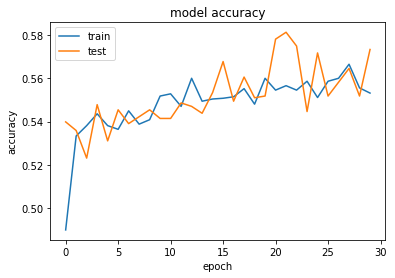

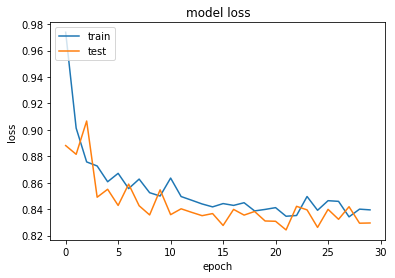

In [16]:
# 시각화 부분
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
# Classifier B의 정확도 계산
accuracy_B = history.history['val_acc'][-1]
print(accuracy_B)

0.5733652376292044
